In [192]:
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [193]:
df = pd.read_csv(r"D:\AI-ML-DS\Iris.csv")

In [112]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
133,134,6.3,2.8,5.1,1.5,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
111,112,6.4,2.7,5.3,1.9,Iris-virginica


In [113]:
df=df.drop(columns=['Id'])

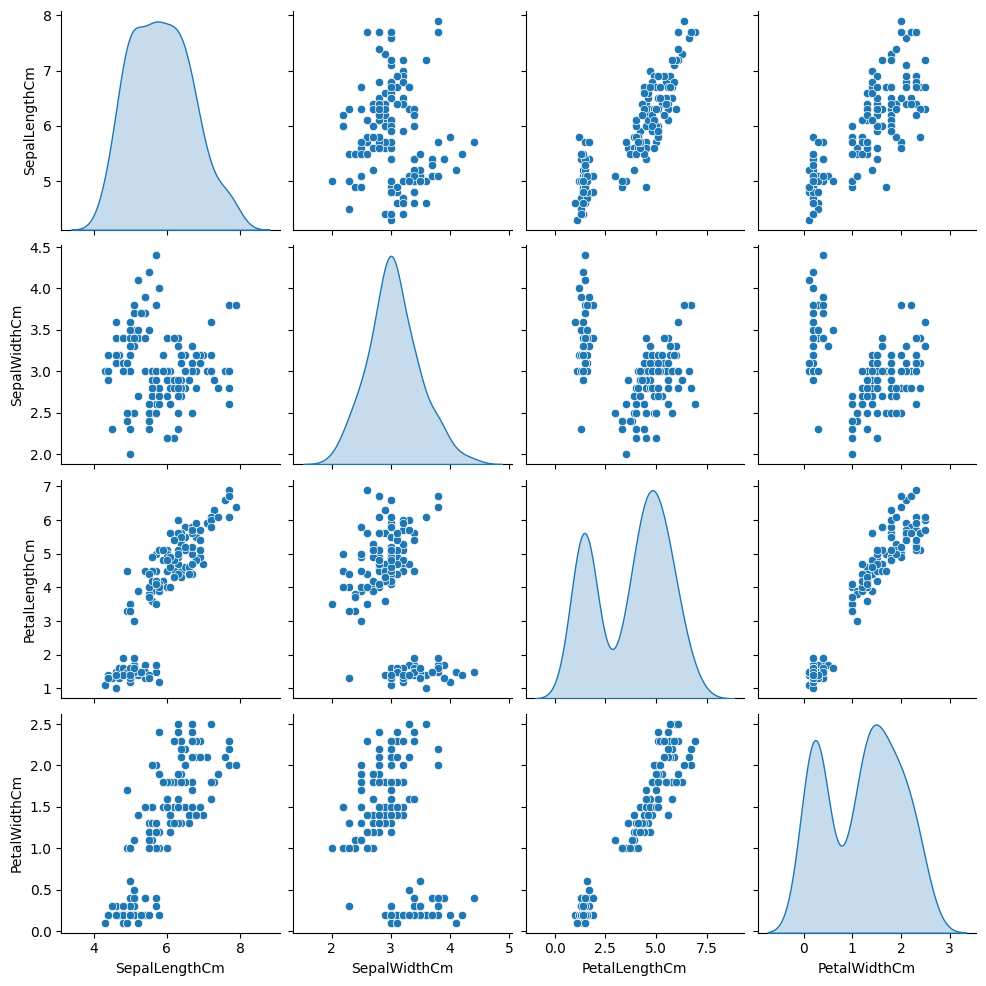

In [127]:
sns.pairplot(df,diag_kind="kde")

In [114]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=42)

In [116]:
clf=LogisticRegression(multi_class='multinomial')

In [117]:
clf.fit(x_train,y_train)

F:\Anaconda1\envs\datasets\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [128]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [120]:
accuracy_score(y_test,clf.predict(x_test))

1.0

In [121]:
confusion_matrix(y_test,clf.predict(x_test))

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [126]:
f1_score(y_test,clf.predict(x_test),average='micro')

1.0

In [134]:
print("classification_report:-\n",classification_report(y_test,clf.predict(x_test)))

classification_report:-
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [162]:
df.sample(5)

,SepalAreaCm,PetalAreaCm,Species
55,15.96,5.85,Iris-versicolor
32,21.32,0.15,Iris-setosa
111,17.28,10.07,Iris-virginica
143,21.76,13.57,Iris-virginica
78,17.40,6.75,Iris-versicolor


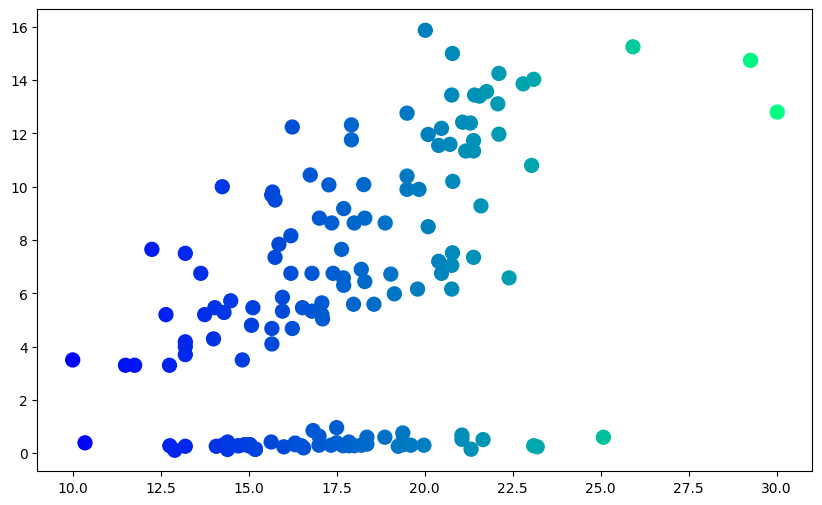

In [177]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['SepalAreaCm'],df['PetalAreaCm'],c=df['SepalAreaCm'],cmap='winter',s=100)

In [195]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['Species'])

In [196]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,0:2],df.iloc[:,-1],test_size=0.2,random_state=42)

In [197]:
clf.fit(x_train,y_train)

F:\Anaconda1\envs\datasets\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [198]:
print("ClassificationReport:-\n",classification_report(y_test,clf.predict(x_test)))

ClassificationReport:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



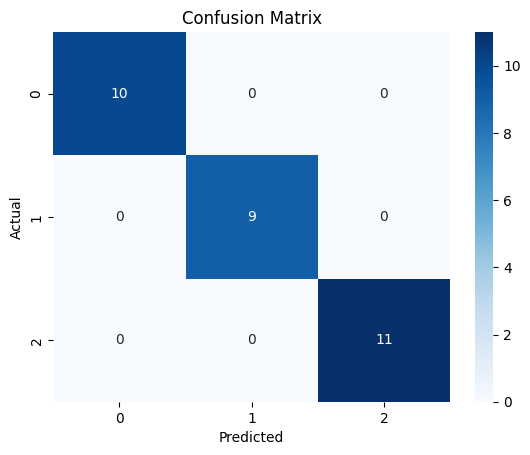

In [199]:
conf_matrix = confusion_matrix(y_test,clf.predict(x_test))
sns.heatmap(conf_matrix,annot=True,cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

F:\Anaconda1\envs\datasets\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


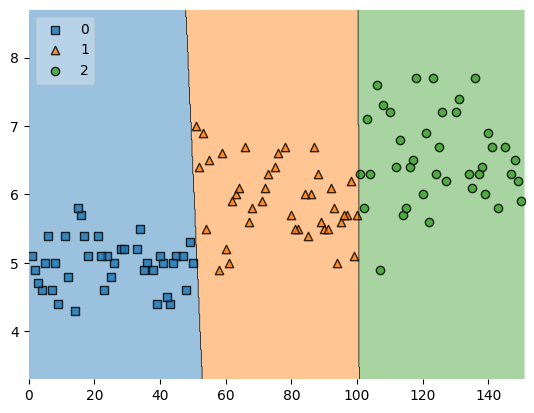

In [200]:
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train.values, y_train.values, clf, legend=2)
plt.show()